# CISC-873-DM-W23-A1 ❤️
## This Notebook is divided into two parts:
#### 1. Answring some questions about data mining subject. 🤓
#### 2. A1 Wish.com Product Rating Prediction problem. 📈
##### Kaggle account name: Manar Elghobashy.

## 1. Answring some questions about data mining subject🤓:
-----------------------------------------------------------------------
#### Q1: Why Data Mining is a misnomer? What is another preferred name?
* It's considered minsomer because we are not search for data itself because we already have it but it's dedicated to extract a knowldege and patterens from a huge amount of data. Another preferred name is Knowledge discovery from databases (KDD). 
-----------------------------------------------------------------------
#### Q2: What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
* it's the process that if we follow its steps we will discover meaningful knowledge and patterns from huge data, and emphasizes the "high-level" application of particular data mining methods.
  the steps are:-

  1. Determine the domain.
  2. Understanding the problem.
  3. Get the task-relevant data from the data warehouse or databases.
  4. Understanding the data.
  5. Cleaning the data.
  6. Choosing the data mining goal and select the best model.
  7. Data mining.
  8. Pattern evaluation.
* They share skills and mindsets, but the main distinction between data engineer and data scientist is that the data engineer is responsible for handling and storing data into databases and large-scale processing systems, as well as developing, constructing, testing, and maintaining architectures and delivering task-relevant data from source to its required destination, whereas the data scientist is responsible for cleaning and organising data. AI engineers develop neural networks, undertake computational analysis, create mathematical models, and implement algorithms that assist robots learn how to accomplish certain jobs, as well as depoly.
-----------------------------------------------------------------------
#### Q3: In data mining, what is the difference between prediction and categorization?
* The primary distinction between prediction and categorization is that categorization (classification) is used to determine the (categorical) labels (discrete value) of objects whose class label is unknown or to classify these observations into their correct categories, such as the type of fruit, whereas prediction (regression) is used to predict the unknown numerical value (continuous value), such as predicting the price of a new house, and it is mostly used to predict the value of something in the future.
-----------------------------------------------------------------------
#### Q4: Why data science/machine learning is a bad idea in the context of information security?
* The CIA triad is a concept for guiding information security policy within an organisation. It is named after three important key terms: confidentiality (a set of rules that restricts information access), integrity (ensuring that the information in the organisation is accurate and reliable), and availability (is a guarantee that only authorised people will have dependable access to information). and we can use it in our AI pipelines to guarantee that the AI pipeline follows CIA guidelines or to check what sort of attacks we are facing and promptly resolve the problem.
types of attacks:
  1. Adversarial (front-end) - Confidentiality.

  2. Backdoor/data poisoning (data source) – Integrity.

  3. Training data reconstruction – Confidentiality (privacy).

  4. Steeling the model - Confidentiality.

  5. Membership inference - Confidentiality (privacy).
-----------------------------------------------------------------------
#### Q5: What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?
* Because data science is a data-driven strategy, it relies on data to work, which may raise the risk of data breach and fine, and as a result, you may develop a faulty model or be fed incorrect information to your model. You must also ensure that you follow data privacy guidelines.


## 2. A1 Wish.com Product Rating Prediction problem ⭐ 
### problem definition:
* The dataset is the wish.com product dataset. We collected the data combined with some available data. Some nosies are added to the dataset. The goal is to predict the product ratings given the other features known for a product on Wish.com. Ratings are in categories from 1 to 5. For one product, the higher the rating ↗ is, the more the customers like the product ❤ . In this way, when you have a new product to be put on wish.com, you can estimate how likely people will like your product, without actually listing out there. Also, by doing this, it helps us to understand under what certain conditions that a product will be highly rated, as a way to understand the customer base of the wish.com.
* input:- various features of the products such as product type, description, price, image, etc. 
* output:- the predicted product rating, which is in categories from 1 to 5. 
* data mining function: classification & prediction.
* challenges:-
  1. the data is not clean and need a lot of preprocessing.
  2. the data is imblanced.
* impact:- Accurate product rating prediction may assist firms understand their client base and customise their offerings to fit customer preferences. It may also assist organisations in determining which characteristics are most essential to customers, which can guide product development and marketing tactics.
*  ideal solution:- An ideal approach would be to create a machine learning model that reliably predicts product ratings based on existing features while also handling missing or noisy data. The model should also be simple to understand so that businesses can identify the most essential criteria for forecasting product ratings. Furthermore, the model should be updated on a regular basis with fresh data to ensure its correctness over time.
------------------------------------------------------------------------
### experimental protocol:
* first, data preprocessing.
* second, convert categorical and string columns to numerical columns.
* third, buliding models and choose the best one.
------------------------------------------------------------------------
### preprocessing steps:
  1. Drop irrelevant and unnecessary features.
  2. Check if there is any null values and replace them.
  3. Create new features from existing features if needed
  4. Clean categorical variables.
------------------------------------------------------------------------
### My solution:
  * First, reading and preprocessing the data.
  * Second, selecting features and preparing them for models.
  * Third, build different models to predict the rating perfectly.
  * fourth, prepare testing data.
  * finally, predict the rating and create the submission file.
  



###  importing required libraries.

In [ ]:
import numpy as np # linear algebra.
import pandas as pd # data processing, CSV file I/O.
# for visualizations.
import matplotlib.pyplot as plt 
import seaborn as sns
# libraries required for models building. 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

## 2.1. reading and preprocessing the data ⚒ 

###### This part will be sectioned into:


1.   reading training data.
2.   exploring data and dropping unnecessary columns.
3.   product_color preprocessing.
4.   product_variation_size_id preprocessing.
5.   origin_country preprocessing.
6.   editing rating column preprocessing.



* 2.1.1 reading training data 📖.

In [ ]:
#using pandas to read train data file.
product_data = pd.read_csv("train_new.csv")
product_data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


* 2.1.2 exploring data to find null and uncorrelated columns 📊.

In [ ]:
# get columns' names.
product_data.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'theme', 'crawl_month', 'id'],
      dtype='object')

In [ ]:
# find out informations about data to see it's dtypes and if it has null values.
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

In [ ]:
# get describtion of data.
product_data.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,349.0,1.094000e+03,1094.000000,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,1.0,2.678399e+04,4.036191,0.155393,772.207495
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.0,8.616171e+04,0.200397,0.362445,453.784430
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918464,0.000000,382.250000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,752.500000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.306200e+04,4.166826,0.000000,1166.500000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


In [ ]:
#count null values.
product_data.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

In [ ]:
# drop null columns.
#only dropped high null columns.
dropped_column = [ 'badge_fast_shipping','shipping_option_name','product_variation_inventory','badge_local_product','has_urgency_banner','merchant_id','urgency_text', 'merchant_profile_picture','merchant_info_subtitle','merchant_title','merchant_name','inventory_total', 'currency_buyer','theme','crawl_month','tags']
for i in dropped_column:
    product_data = product_data.drop([i], axis=1)
print('Feature selection completed successfully')

Feature selection completed successfully


<Axes: >

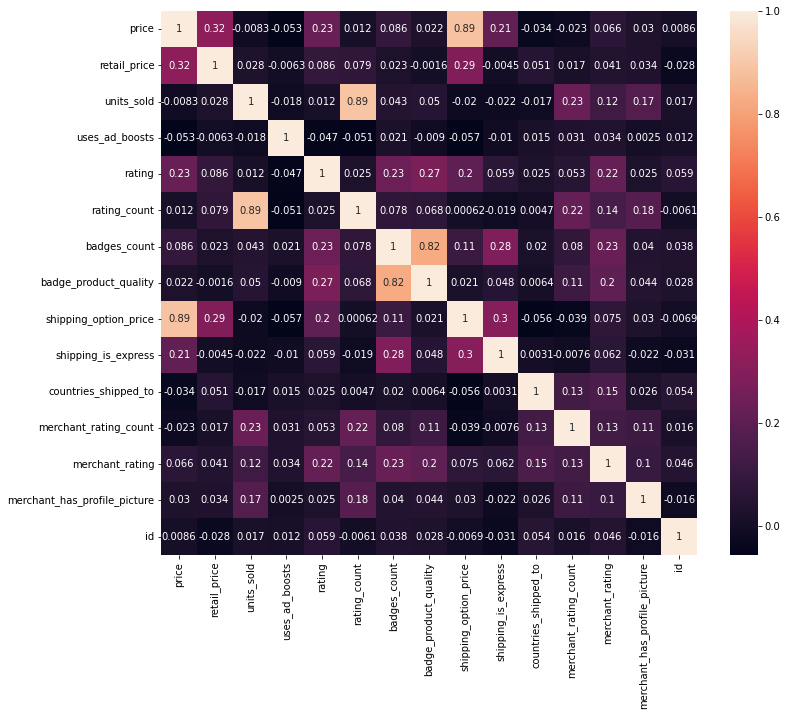

In [ ]:
# get correlation map of columns.
plt.figure(figsize=(12,10))
sns.heatmap(product_data.corr(), annot=True)


In [ ]:
# make correlation matrix.
corr_matrix = pd.DataFrame(product_data.corr())
corr_matrix

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,shipping_option_price,shipping_is_express,countries_shipped_to,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
price,1.000000,0.321920,-0.008284,-0.053380,0.226129,0.012339,0.086400,0.021911,0.887445,0.208582,-0.034094,-0.022850,0.066437,0.029713,0.008551
retail_price,0.321920,1.000000,0.027722,-0.006258,0.086251,0.078602,0.022785,-0.001645,0.287595,-0.004474,0.050735,0.016605,0.040908,0.033650,-0.028327
units_sold,-0.008284,0.027722,1.000000,-0.018159,0.011729,0.891939,0.042773,0.049948,-0.020206,-0.021991,-0.017361,0.228540,0.120750,0.170553,0.016600
uses_ad_boosts,-0.053380,-0.006258,-0.018159,1.000000,-0.047359,-0.050653,0.020953,-0.008984,-0.056537,-0.010482,0.014885,0.031173,0.034378,0.002542,0.011666
rating,0.226129,0.086251,0.011729,-0.047359,1.000000,0.025344,0.234001,0.273749,0.202719,0.059141,0.024565,0.052712,0.216270,0.025481,0.058845
rating_count,0.012339,0.078602,0.891939,-0.050653,0.025344,1.000000,0.077896,0.067971,0.000618,-0.018663,0.004655,0.219061,0.140424,0.181525,-0.006072
badges_count,0.086400,0.022785,0.042773,0.020953,0.234001,0.077896,1.000000,0.823006,0.107870,0.283906,0.019558,0.080269,0.226098,0.040392,0.038217
badge_product_quality,0.021911,-0.001645,0.049948,-0.008984,0.273749,0.067971,0.823006,1.000000,0.021048,0.047501,0.006381,0.109926,0.202867,0.044397,0.028140
shipping_option_price,0.887445,0.287595,-0.020206,-0.056537,0.202719,0.000618,0.107870,0.021048,1.000000,0.300716,-0.056048,-0.038649,0.075006,0.030000,-0.006861
shipping_is_express,0.208582,-0.004474,-0.021991,-0.010482,0.059141,-0.018663,0.283906,0.047501,0.300716,1.000000,0.003071,-0.007577,0.061583,-0.022492,-0.031316


In [ ]:
# checking null values again.
product_data.isnull().sum()

price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
badges_count                     0
badge_product_quality            0
product_color                   29
product_variation_size_id       12
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
origin_country                  12
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
id                               0
dtype: int64

* 2.1.3 product_color preprocessing 🎨

In [ ]:
# color column values.
count = product_data['product_color'].value_counts()
count

black             219
white             173
blue               77
yellow             69
pink               68
                 ... 
claret              1
brown & yellow      1
whitestripe         1
Pink                1
light green         1
Name: product_color, Length: 87, dtype: int64

In [ ]:
# drop rows with null color values.
# get name values of colors.
np.sort(product_data['product_color'].dropna().unique())


array(['Army green', 'Black', 'Blue', 'Pink', 'RED', 'Rose red', 'White',
       'applegreen', 'apricot', 'army', 'armygreen', 'beige', 'black',
       'black & blue', 'black & green', 'black & white', 'black & yellow',
       'blackwhite', 'blue', 'blue & pink', 'brown', 'brown & yellow',
       'burgundy', 'camel', 'camouflage', 'claret', 'coffee', 'coolblack',
       'darkblue', 'darkgreen', 'denimblue', 'dustypink', 'floral',
       'fluorescentgreen', 'gold', 'gray', 'green', 'grey', 'ivory',
       'khaki', 'lakeblue', 'leopard', 'leopardprint', 'light green',
       'lightblue', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink',
       'lightred', 'lightyellow', 'mintgreen', 'multicolor', 'navy',
       'navy blue', 'navyblue', 'navyblue & white', 'nude', 'offwhite',
       'orange', 'orange-red', 'pink', 'pink & black', 'pink & blue',
       'pink & grey', 'pink & white', 'purple', 'rainbow', 'red', 'rose',
       'rosegold', 'rosered', 'silver', 'skyblue', 'star', 'violet',


In [ ]:
# make all values in lower case.
product_data['product_color'] = product_data['product_color'].str.lower()

In [ ]:
# get names of colors that hasve two values with '&' sign.
product_data[product_data['product_color'].str.contains('&', na=False)]['product_color'].unique()

array(['white & green', 'pink & black', 'pink & white', 'black & yellow',
       'navyblue & white', 'black & blue', 'black & green',
       'white & black', 'black & white', 'pink & blue', 'brown & yellow',
       'blue & pink', 'winered & yellow', 'pink & grey'], dtype=object)

In [ ]:
# convert shades of a color into this color to limit number of values in color column.
shade_to_colour = {
    'navyblue': 'blue', 'lightblue': 'blue', 'skyblue': 'blue', 'lakeblue': 'blue', 'darkblue': 'blue', 'denimblue': 'blue', 'navy blue': 'blue', 'prussianblue': 'blue',
    'navy': 'blue',
    'armygreen': 'green', 'army green': 'green', 'fluorescentgreen': 'green', 'mintgreen': 'green', 'light green': 'green', 'lightgreen': 'green',
    'applegreen': 'green', 'darkgreen': 'green', 'army': 'green', 'khaki': 'green', 'lightkhaki': 'green',
    'lightyellow': 'yellow', 
    'winered': 'red', 'wine red': 'red', 'lightred': 'red', 'coralred': 'red', 'rose red': 'red', 'watermelonred': 'red', 'orange-red': 'red', 'rosered': 'red',
    'claret': 'red', 'burgundy': 'red', 
    'gray': 'grey', 'silver': 'grey','lightgray': 'grey', 'lightgrey': 'grey', 'greysnakeskinprint': 'grey',
    'coffee': 'brown', 'camel': 'brown', 'tan': 'brown', 
    'offwhite': 'white', 'ivory': 'white', 'nude': 'white',
    'lightpink': 'pink', 'dustypink':'pink', 'rosegold': 'pink',
    'lightpurple': 'purple', 'coolblack': 'black', 'apricot': 'orange', 'offblack': 'black'
}
# a function to convert colors.
def update_color(col):
    if shade_to_colour.get(col, False):
        return shade_to_colour.get(col)
    elif '&' in col:
        return 'dual'
    elif col in shade_to_colour.values():
        return col
    else:
        return 'other'
#replace nan value with 'other'.
product_data['product_color'].replace(np.nan, 'others', inplace=True)
#apply the update color function.
product_data['product_color'] = product_data.product_color.apply(update_color)

In [ ]:
#count values of color again.
count = product_data['product_color'].value_counts()
count

black     224
white     179
blue      122
green     106
red        96
pink       76
yellow     70
other      68
grey       57
purple     37
dual       30
orange     17
brown      12
Name: product_color, dtype: int64

In [ ]:
#grouping colors with ratings to get insights about how many every color contributes in rating and which has the highest contribution.
colors = product_data.groupby('product_color').agg('sum')['rating'].to_frame()
colors.reset_index(level=0, inplace=True)
colors

,product_color,rating
0,black,917.0
1,blue,471.0
2,brown,47.0
3,dual,127.0
4,green,427.0
5,grey,233.0
6,orange,67.0
7,other,283.0
8,pink,298.0
9,purple,151.0


<Axes: xlabel='product_color', ylabel='rating'>

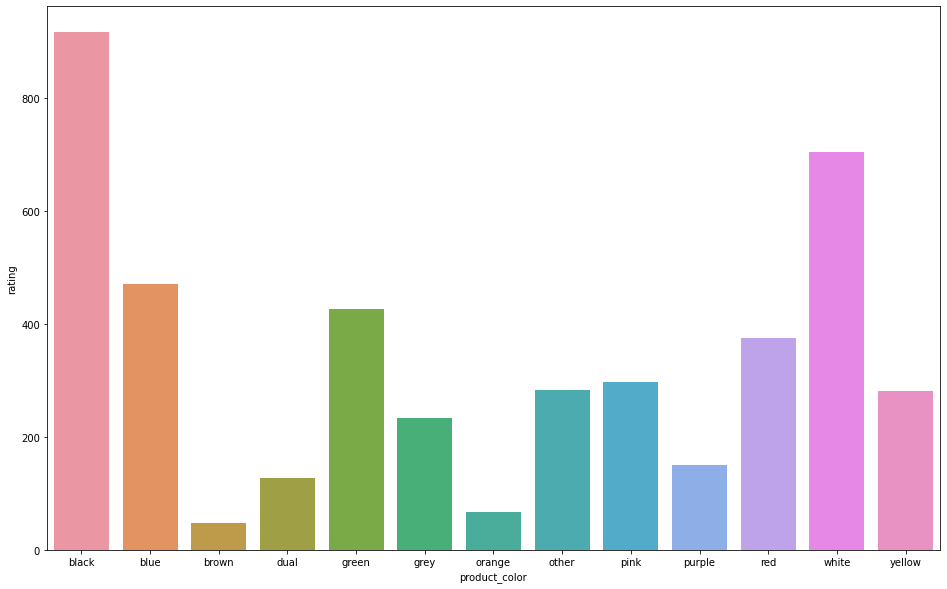

In [ ]:
# visualizing color-rating contribution.
fig = plt.gcf()
fig.set_size_inches( 16, 10)
sns.barplot(x="product_color", y="rating", data=colors)

In [ ]:
#convert colors values into one-hot-encoding.
product_data = pd.get_dummies(product_data, 
                           columns = ['product_color'],
                           prefix = 'color_')
product_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,product_variation_size_id,shipping_option_price,...,color__dual,color__green,color__grey,color__orange,color__other,color__pink,color__purple,color__red,color__white,color__yellow
0,8.00,7,10000,1,4.0,1670,0,0,M,3,...,0,0,0,0,0,0,0,0,0,1
1,8.00,7,1000,0,4.0,843,1,0,L,3,...,0,0,0,0,0,0,0,0,0,0
2,6.00,34,100,0,4.0,10,0,0,L,2,...,0,0,0,0,0,0,0,0,1,0
3,4.67,4,100,1,3.0,82,0,0,XS,1,...,0,0,0,0,0,0,0,0,0,0
4,8.00,11,1000,0,4.0,127,0,0,S,3,...,0,0,0,1,0,0,0,0,0,0


* 2.1.4 product_variation_size_id preprocessing. 🧥👚👞👟👢🥿

In [ ]:
## size_id
product_data['product_variation_size_id'].unique()


array(['M', 'L', 'XS', 'S', 'XL', '26(Waist 72cm 28inch)', 'S.',
       'S(bust 88cm)', 'XXS', 's', '29', nan, 'choose a size', 'XXXS',
       'Base Coat', 'Size M', 'XXL', 'M.', 'XS.',
       '100 x 100cm(39.3 x 39.3inch)', '2pcs', '4XL', '1', '25-S',
       'Size-XXS', '5PAIRS', '35', 'Pack of 1', 'Size S', 'Size-S', '6XL',
       '25', 'S/M(child)', '60', 'Size-XS', 'S (waist58-62cm)',
       'SIZE XXS', '10 ml', 'X   L', 'Women Size 36', '04-3XL',
       'Size -XXS', '1 pc.', 'Floating Chair for Kid', 'S Pink', '34',
       'US-S', 'Size XXS', 'pants-S', 'XXXXL', 'SIZE-XXS', 'SIZE XS',
       '1pc', 'Size S.', '100 cm', 'S..', 'Round', '4-5 Years', '5', '33',
       '30 cm', '2', 'XXXXXL', '20PCS-10PAIRS', '2XL', 'Size-5XL',
       'Size4XL', 'One Size', 'size S', 'Size/S', 'B', 'SizeL', '20pcs',
       '1 PC - XL', 'Suit-S', 'Base & Top & Matte Top Coat',
       'Baby Float Boat', '1m by 3m', 'SIZE S', 'White', '40 cm', '5XL',
       '10pcs', 'H01'], dtype=object)

In [ ]:
# replacing special characters and useless parts fron values and make all value lower case.
product_data['product_variation_size_id'] = product_data['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')

<ipython-input-21-ba70d5b0391a>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  product_data['product_variation_size_id'] = product_data['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')


In [ ]:
product_data['product_variation_size_id'] = product_data['product_variation_size_id'].replace('2xl', 'xl')
product_data['product_variation_size_id'] = product_data['product_variation_size_id'].replace('3xl', 'xl')
product_data['product_variation_size_id'] = product_data['product_variation_size_id'].replace('4xl', 'xl')
product_data['product_variation_size_id'] = product_data['product_variation_size_id'].replace('5xl', 'xl')
product_data['product_variation_size_id'] = product_data['product_variation_size_id'].replace('6xl', 'xl')
product_data['product_variation_size_id'] = product_data['product_variation_size_id'].replace('x   l', 'xl')
product_data['product_variation_size_id'] = product_data['product_variation_size_id'].replace('sizel', 'l')
product_data['product_variation_size_id'] = product_data['product_variation_size_id'].replace('size4xl', 'xl')
product_data['product_variation_size_id'] = product_data['product_variation_size_id'].replace('x   l', 'xl')
product_data['product_variation_size_id'] = product_data['product_variation_size_id'].replace('1 pc - xl', 'xl')

In [ ]:
# applying a function to edit size values and replace null values with 'other'.
def edit_size_id(i):
    if i in 'xl,l,s,xs,m,xxl,xxxs,xxxxxl,xxxxl'.split(','):
        return i
    else:
        return 'other'

product_data['product_variation_size_id'] = product_data['product_variation_size_id'].replace(np.nan, 'OTHER')
product_data['product_variation_size_id'] = product_data['product_variation_size_id'].apply(edit_size_id)

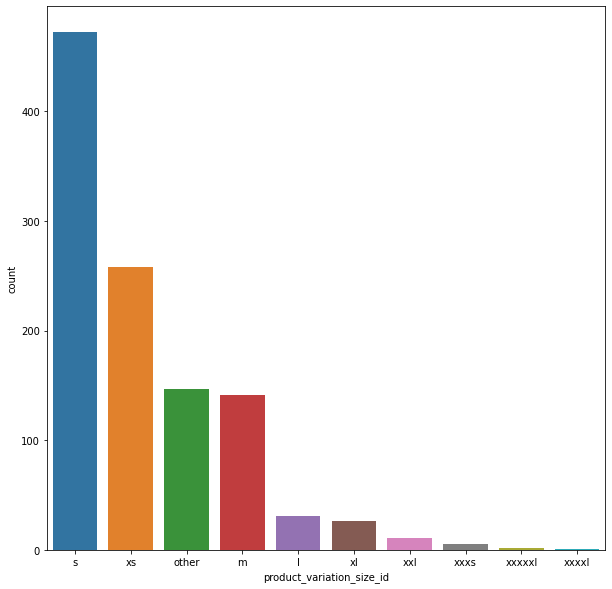

In [ ]:
#visualizing size data after editing.
fig = plt.gcf()
fig.set_size_inches( 10, 10)
sns.countplot( data= product_data,x=product_data['product_variation_size_id'],order = product_data['product_variation_size_id'].value_counts().index)
plt.show()

In [ ]:
# convert size columns with thier one-hot-encoding.
product_data = pd.get_dummies(product_data, 
                           columns = ['product_variation_size_id'],
                           prefix = 'size_')
product_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,shipping_option_price,shipping_is_express,...,size__l,size__m,size__other,size__s,size__xl,size__xs,size__xxl,size__xxxs,size__xxxxl,size__xxxxxl
0,8.00,7,10000,1,4.0,1670,0,0,3,0,...,0,1,0,0,0,0,0,0,0,0
1,8.00,7,1000,0,4.0,843,1,0,3,0,...,1,0,0,0,0,0,0,0,0,0
2,6.00,34,100,0,4.0,10,0,0,2,0,...,1,0,0,0,0,0,0,0,0,0
3,4.67,4,100,1,3.0,82,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,8.00,11,1000,0,4.0,127,0,0,3,0,...,0,0,0,1,0,0,0,0,0,0


* 2.1.5 origin_country preprocessing 🌏🌍🌎🗺️

In [ ]:
# get unique values of origin_country. 
product_data['origin_country'].unique()

array(['CN', 'US', 'GB', nan, 'SG', 'VE'], dtype=object)

In [ ]:
# fill null rows with most frequent value.
product_data['origin_country']=product_data['origin_country'].fillna(product_data['origin_country'].mode().iloc[0])

In [ ]:
# check if there is null again or not.
product_data['origin_country'].unique()

array(['CN', 'US', 'GB', 'SG', 'VE'], dtype=object)

In [ ]:
# replace values of origin country by thier one-hot-encoding.
product_data = pd.get_dummies(product_data, 
                           columns = ['origin_country'],
                           prefix = 'coun_')
product_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,shipping_option_price,shipping_is_express,...,size__xs,size__xxl,size__xxxs,size__xxxxl,size__xxxxxl,coun__CN,coun__GB,coun__SG,coun__US,coun__VE
0,8.00,7,10000,1,4.0,1670,0,0,3,0,...,0,0,0,0,0,1,0,0,0,0
1,8.00,7,1000,0,4.0,843,1,0,3,0,...,0,0,0,0,0,1,0,0,0,0
2,6.00,34,100,0,4.0,10,0,0,2,0,...,0,0,0,0,0,1,0,0,0,0
3,4.67,4,100,1,3.0,82,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,8.00,11,1000,0,4.0,127,0,0,3,0,...,0,0,0,0,0,1,0,0,0,0


* 2.1.6 editing rating column 📈 ⭐

In [ ]:
product_data['rating'].unique()

array([4., 3., 5., 2., 1., 6.])

In [ ]:
# rating supposed to be from 1 to 5 so 6 need to be removed.
product_data=product_data[product_data['rating'] !=6]
product_data = product_data.reset_index(drop=True)

### 2.2 check and prepare data before building models. 👩🏻‍💻






> * 2.2.1 checking data.



In [ ]:
# check null values.
product_data.isnull().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_product_quality           0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
id                              0
color__black                    0
color__blue                     0
color__brown                    0
color__dual                     0
color__green                    0
color__grey                     0
color__orange                   0
color__other                    0
color__pink                     0
color__purple                   0
color__red                      0
color__white                    0
color__yellow                   0
size__l                         0
size__m       

In [ ]:
# a report of data information and it's coulmns datatypes.
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1093 non-null   float64
 1   retail_price                  1093 non-null   int64  
 2   units_sold                    1093 non-null   int64  
 3   uses_ad_boosts                1093 non-null   int64  
 4   rating                        1093 non-null   float64
 5   rating_count                  1093 non-null   int64  
 6   badges_count                  1093 non-null   int64  
 7   badge_product_quality         1093 non-null   int64  
 8   shipping_option_price         1093 non-null   int64  
 9   shipping_is_express           1093 non-null   int64  
 10  countries_shipped_to          1093 non-null   int64  
 11  merchant_rating_count         1093 non-null   int64  
 12  merchant_rating               1093 non-null   float64
 13  mer



> * 2.2.2 preparing data.



In [ ]:
# save the id, rating columns in a variable before dropping them 
id_col= product_data['id']
target_col= product_data['rating']
id_col

0        272
1       1515
2        940
3        309
4        226
        ... 
1088    1381
1089     212
1090     163
1091     674
1092    1536
Name: id, Length: 1093, dtype: int64

In [ ]:
# dropping id, rating coulmns.
product_data = product_data.drop(['id','rating'], axis=1)

In [ ]:
# get unique values in rating columns
classes= target_col.unique()
classes

array([4., 3., 5., 2., 1.])

In [ ]:
#drop unnecessary columns.
product_data = product_data.drop(['size__xxxxxl','size__l','coun__SG','color__black','coun__GB'], axis=1)
product_data

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,shipping_option_price,shipping_is_express,countries_shipped_to,...,size__other,size__s,size__xl,size__xs,size__xxl,size__xxxs,size__xxxxl,coun__CN,coun__US,coun__VE
0,8.00,7,10000,1,1670,0,0,3,0,30,...,0,0,0,0,0,0,0,1,0,0
1,8.00,7,1000,0,843,1,0,3,0,37,...,0,0,0,0,0,0,0,1,0,0
2,6.00,34,100,0,10,0,0,2,0,41,...,0,0,0,0,0,0,0,1,0,0
3,4.67,4,100,1,82,0,0,1,0,25,...,0,0,0,1,0,0,0,1,0,0
4,8.00,11,1000,0,127,0,0,3,0,15,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,4.00,4,10000,0,2150,0,0,1,0,41,...,0,1,0,0,0,0,0,1,0,0
1089,5.00,5,1000,0,377,1,1,2,0,35,...,1,0,0,0,0,0,0,1,0,0
1090,9.00,48,1000,1,135,0,0,3,0,25,...,0,0,0,0,0,0,0,1,0,0
1091,11.00,10,10000,1,1479,0,0,2,0,45,...,0,0,0,0,0,0,0,1,0,0


### 2.3. build models.
-in this section I tried to build different models to get best accuracy, and these models are:
* Decision tree with 3 different hyperparameter combination.
* Support vector machines with two different hyperparameters combinations.
* Gaussian naive bayes model.
* random forest classifier with two different hyperparameters combinaton. 

In [ ]:
# splitting [product_data] dataset into train and test. 
X_train, X_test, y_train, y_test = train_test_split(product_data, target_col, test_size = .30, random_state=1)

* 2.3.1 Decision tree classifier model 1.

In [ ]:
# build the model using grid search to find the best hyperparameter combination.
DT_model = DecisionTreeClassifier(random_state=1)
leaf_range = list(i for i in range(1, 15))
grid_param = {"criterion" : ["gini" , "entropy"], "max_depth" : leaf_range, "min_samples_leaf": leaf_range}
grid_DT = GridSearchCV(DT_model , param_grid= grid_param , cv= 5, n_jobs= -1, scoring = 'accuracy')
grid_DT.fit(X_train, y_train)
print(grid_DT.best_params_)
print(grid_DT.best_score_)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1}
0.7738562091503267


In [ ]:
# refit the model with the best parameters.
dtc = DecisionTreeClassifier(criterion= "entropy", max_depth= 6 , min_samples_leaf= 1 , random_state= 1)
dtc.fit(X_train, y_train)
ypred=dtc.predict(X_test)
f1= f1_score(y_test, ypred,average="weighted") 
accuracy= accuracy_score(y_test, ypred) 

print('F1 score for Decision tree 1 is:', f1)
print('accuracy score for Decision tree 1 is:', accuracy)


F1 score for Decision tree 1 is: 0.7170090275100542
accuracy score for Decision tree 1 is: 0.7530487804878049


* 2.3.2 Decision tree classifier model 2.

In [ ]:
# build another model with different parameters.
dtc2 = DecisionTreeClassifier(criterion= "gini", max_depth= 3 , min_samples_leaf= 1 , random_state= 42)
dtc2.fit(X_train, y_train)
ypred=dtc2.predict(X_test)

# get F1 score and accuracy to see the model performance.
f1= f1_score(y_test, ypred,average="weighted") 
accuracy= accuracy_score(y_test, ypred) 

print('F1 score for Decision tree 2 is:', f1)
print('accuracy score for Decision tree 2 is:', accuracy)

F1 score for Decision tree 2 is: 0.7217433268652236
accuracy score for Decision tree 2 is: 0.774390243902439


* 2.3.3 Decision tree classifier model 3.

In [ ]:
# fit the model with different hyperparameters.
dtc3 = DecisionTreeClassifier(criterion= "entropy", max_depth= 5 , min_samples_leaf= 1 , random_state= 3)
dtc3.fit(X_train, y_train)
ypred=dtc3.predict(X_test)
# get F1 score and accuracy to see the model performance.
f1= f1_score(y_test, ypred,average="weighted") 
accuracy= accuracy_score(y_test, ypred) 

print('F1 score for Decision tree 3 is:', f1)
print('accuracy score for Decision tree 3 is:', accuracy)

F1 score for Decision tree 3 is: 0.7173836466309131
accuracy score for Decision tree 3 is: 0.7530487804878049


* 2.3.4 SVM classifier model 1.

In [ ]:
#using randomSearchCV to find optimal hyperparameters in Support vector machine.
p_grid_search = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}  
  
rand_svc = RandomizedSearchCV(SVC(random_state=3), p_grid_search, cv = 5,refit = True, n_jobs= -1, scoring = 'accuracy')
  
# fitting the model for random search
rand_svc.fit(X_train, y_train)
print(rand_svc.best_params_)
print(rand_svc.best_score_)
print(rand_svc.best_estimator_)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'kernel': 'rbf', 'gamma': 1, 'C': 1}
0.7581699346405228
SVC(C=1, gamma=1, random_state=3)


In [ ]:
# refit the model with the best hyperparameter.
best_svm_rand = SVC( kernel = 'rbf', C=100 , gamma=1 , random_state = 3, probability=True)
best_svm_rand.fit(X_train, y_train)
ypred=best_svm_rand.predict(X_test)

# calculating F1 score and accuracy to see the performance.
f1= f1_score(y_test, ypred,average='weighted') 
accuracy= accuracy_score(y_test, ypred) 

print('F1 score for svm is:', f1)
print('accuracy score for svm is:', accuracy)

F1 score for svm is: 0.6759431614410976
accuracy score for svm is: 0.7469512195121951



* 2.3.5 SVM classifier model 2

In [ ]:
best_svm2 = SVC( kernel = 'rbf', C=1000 , gamma=0.01 , random_state = 22 , probability=True)
best_svm2.fit(X_train, y_train)
ypred=best_svm2.predict(X_test)
f1= f1_score(y_test, ypred,average='weighted') 
accuracy= accuracy_score(y_test, ypred) 

print('F1 score for svm 2 is:', f1)
print('accuracy score for svm 2 is:', accuracy)

F1 score for svm 2 is: 0.6764337738362187
accuracy score for svm 2 is: 0.7469512195121951


2.3.6 Naive bayes model.

In [ ]:
#using GridSearchCV to find optimal hyperparameters in GaussianNB.
gnb = GaussianNB()
param_grid_nb = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
gridsearch_clf = GridSearchCV(gnb,param_grid_nb,n_jobs=5)
gridsearch_clf.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=GaussianNB(), n_jobs=5,
             param_grid={'var_smoothing': [0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                           1e-07, 1e-08, 1e-09, 1e-10, 1e-11,
                                           1e-12, 1e-13, 1e-14, 1e-15]})

In [ ]:
print(gridsearch_clf.best_score_)
print(gridsearch_clf.best_estimator_)

0.6679738562091503
GaussianNB(var_smoothing=0.01)


In [ ]:
# refit the model with the best hyperparameters.
gnb_model = GaussianNB(var_smoothing=0.01)
gnb_model.fit(X_train,y_train)
ypred=gnb_model.predict(X_test)
# calculating F1 score and accuracy to see the performance.
f1= f1_score(y_test, ypred,average='weighted') 
accuracy= accuracy_score(y_test, ypred) 

print('F1 score for gnb is:', f1)
print('accuracy score for gnb is:', accuracy)

F1 score for gnb is: 0.590596919127086
accuracy score for gnb is: 0.6951219512195121


* 2.3.7 random forest model 1.

In [ ]:
# using grid search to find the best hyperparameter in Random forest classifier.
rfc = RandomForestClassifier(random_state=1)

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(1,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 5,refit = True, n_jobs= -1, scoring='accuracy')

clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


0.8013071895424837
{'max_depth': 14, 'max_features': 3}


In [ ]:
#refit the model with the best hyperparameter.
best_rfc = RandomForestClassifier(max_depth=14,max_features=3,random_state=1)
best_rfc.fit(X_train,y_train)
ypred=best_rfc.predict(X_test)

# calculating F1 score and accuracy to see the performance.
f1= f1_score(y_test, ypred,average='weighted') 
accuracy= accuracy_score(y_test, ypred) 

print('F1 score for best_rfc is:', f1)
print('accuracy score for best_rfc is:', accuracy)

F1 score for best_rfc is: 0.7569239126244233
accuracy score for best_rfc is: 0.7896341463414634


* 2.3.8 random forest model 2.

In [ ]:
# a random forest model with different parameters combinations with grid search.
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'max_features': list(range(1,15)),
    'max_depth' : list(range(1, 15)),
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_score_)
print(CV_rfc.best_params_)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


0.8
{'criterion': 'entropy', 'max_depth': 14, 'max_features': 6}


In [ ]:
#re fit the model with the best hyperparameters.
rfc2=RandomForestClassifier(random_state=42, max_features=6, max_depth=14, criterion='entropy')
rfc2.fit(X_train,y_train)
ypred=rfc2.predict(X_test)

# calculating F1 score and accuracy to see the performance.
f1= f1_score(y_test, ypred,average='weighted') 
accuracy= accuracy_score(y_test, ypred) 

print('F1 score for rfc2 is:', f1)
print('accuracy score for rfc2 is:', accuracy)

F1 score for rfc2 is: 0.7636563135853146
accuracy score for rfc2 is: 0.7926829268292683


### 2.4 preprocessing test data.

In [ ]:
# reading the test data.
test_data = pd.read_csv("test_new.csv")
test_data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


In [ ]:
# see the test data information.
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   currency_buyer                479 non-null    object 
 3   units_sold                    479 non-null    int64  
 4   uses_ad_boosts                479 non-null    int64  
 5   rating_count                  479 non-null    int64  
 6   badges_count                  479 non-null    int64  
 7   badge_local_product           479 non-null    int64  
 8   badge_product_quality         479 non-null    int64  
 9   badge_fast_shipping           479 non-null    int64  
 10  tags                          479 non-null    object 
 11  product_color                 467 non-null    object 
 12  product_variation_size_id     477 non-null    object 
 13  produ

In [ ]:
# see if there is any null in the test data.
test_data.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
urgency_text                    355
origin_country                    5
merchant_title                    0
merchant_name                     0
merchant_info_subtitle            1
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

In [ ]:
# saving the id column beforee dropping it.
# drop the same columns as the train data.
id_col2= test_data['id']
dropped_column = [ 'badge_fast_shipping','shipping_option_name','product_variation_inventory','badge_local_product','has_urgency_banner','merchant_id','id','urgency_text', 'merchant_profile_picture','merchant_info_subtitle','merchant_title','merchant_name','inventory_total', 'currency_buyer','theme','crawl_month','tags']
for i in dropped_column:
    test_data = test_data.drop([i], axis=1)
print('Feature selection completed successfully')

Feature selection completed successfully


In [ ]:
# see the null in the data.
test_data.isnull().sum()

price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating_count                     0
badges_count                     0
badge_product_quality            0
product_color                   12
product_variation_size_id        2
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
origin_country                   5
merchant_rating_count            0
merchant_rating                  0
merchant_has_profile_picture     0
dtype: int64

In [ ]:
# preprocessing the product color column as the train data.
np.sort(test_data['product_color'].fillna(test_data['product_color'].mode().iloc[0]).unique())
test_data['product_color'] = test_data['product_color'].str.lower()
test_data[test_data['product_color'].str.contains('&', na=False)]['product_color'].unique()
####
shade_to_colour = {
    'navyblue': 'blue', 'lightblue': 'blue', 'skyblue': 'blue', 'lakeblue': 'blue', 'darkblue': 'blue', 'denimblue': 'blue', 'navy blue': 'blue', 'prussianblue': 'blue',
    'navy': 'blue',
    'armygreen': 'green', 'army green': 'green', 'fluorescentgreen': 'green', 'mintgreen': 'green', 'light green': 'green', 'lightgreen': 'green',
    'applegreen': 'green', 'darkgreen': 'green', 'army': 'green', 'khaki': 'green', 'lightkhaki': 'green',
    'lightyellow': 'yellow', 
    'winered': 'red', 'wine red': 'red', 'lightred': 'red', 'coralred': 'red', 'rose red': 'red', 'watermelonred': 'red', 'orange-red': 'red', 'rosered': 'red',
    'claret': 'red', 'burgundy': 'red', 
    'gray': 'grey', 'silver': 'grey','lightgray': 'grey', 'lightgrey': 'grey', 'greysnakeskinprint': 'grey',
    'coffee': 'brown', 'camel': 'brown', 'tan': 'brown', 
    'offwhite': 'white', 'ivory': 'white', 'nude': 'white',
    'lightpink': 'pink', 'dustypink':'pink', 'rosegold': 'pink',
    'lightpurple': 'purple', 'coolblack': 'black', 'apricot': 'orange', 'offblack': 'black'
}

def update_color(col):
    if shade_to_colour.get(col, False):
        return shade_to_colour.get(col)
    elif '&' in col:
        return 'dual'
    elif col in shade_to_colour.values():
        return col
    else:
        return 'other'

test_data['product_color'].replace(np.nan, 'others', inplace=True)

test_data['product_color'] = test_data.product_color.apply(update_color)
####
test_data = pd.get_dummies(test_data, 
                           columns = ['product_color'],
                           prefix = 'color_',
                           drop_first = True)
test_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,product_variation_size_id,shipping_option_price,shipping_is_express,...,color__dual,color__green,color__grey,color__orange,color__other,color__pink,color__purple,color__red,color__white,color__yellow
0,5.75,5,10,1,0,0,0,XS,2,0,...,0,0,0,0,0,0,0,0,1,0
1,7.00,7,5000,0,579,0,0,XS,2,0,...,0,0,0,0,0,0,0,0,0,0
2,5.00,16,1000,1,62,0,0,XS,2,0,...,0,0,0,0,0,0,0,0,0,0
3,18.00,27,5000,1,1903,0,0,M,5,0,...,0,0,0,0,0,0,0,0,0,0
4,12.00,81,20000,0,1799,0,0,M,3,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# preprocessing the size column.
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('2xl', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('3xl', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('4xl', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('5xl', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('6xl', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('x   l', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('sizel', 'l')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('size4xl', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('x   l', 'xl')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace('1 pc - xl', 'xl')
#####
def edit_size_id(i):
    if i in 'xl,l,s,xs,m,xxl,xxxs,xxxxxl,xxxxl'.split(','):
        return i
    else:
        return 'other'

test_data['product_variation_size_id'] = test_data['product_variation_size_id'].replace(np.nan, 'OTHER')
test_data['product_variation_size_id'] = test_data['product_variation_size_id'].apply(edit_size_id)
####
test_data = pd.get_dummies(test_data, 
                           columns = ['product_variation_size_id'],
                           prefix = 'size_',
                           drop_first = True)
test_data.head()

<ipython-input-59-8011f1c679ff>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_data['product_variation_size_id'] = test_data['product_variation_size_id'].str.lower().str.replace('.', '').str.replace('size--', '').str.replace('size -', '').str.replace('size/', '').str.replace('size ', '').str.replace('size-', '')


,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,shipping_option_price,shipping_is_express,countries_shipped_to,...,color__white,color__yellow,size__m,size__other,size__s,size__xl,size__xs,size__xxl,size__xxxs,size__xxxxl
0,5.75,5,10,1,0,0,0,2,0,139,...,1,0,0,0,0,0,1,0,0,0
1,7.00,7,5000,0,579,0,0,2,0,31,...,0,0,0,0,0,0,1,0,0,0
2,5.00,16,1000,1,62,0,0,2,0,41,...,0,0,0,0,0,0,1,0,0,0
3,18.00,27,5000,1,1903,0,0,5,0,42,...,0,0,1,0,0,0,0,0,0,0
4,12.00,81,20000,0,1799,0,0,3,0,38,...,1,0,1,0,0,0,0,0,0,0


In [ ]:
#preprocessing the origin country column.
test_data['origin_country']=test_data['origin_country'].fillna(test_data['origin_country'].mode().iloc[0])
test_data = pd.get_dummies(test_data, 
                           columns = ['origin_country'],
                           prefix = 'coun_',
                           drop_first = True)
test_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,shipping_option_price,shipping_is_express,countries_shipped_to,...,size__other,size__s,size__xl,size__xs,size__xxl,size__xxxs,size__xxxxl,coun__CN,coun__US,coun__VE
0,5.75,5,10,1,0,0,0,2,0,139,...,0,0,0,1,0,0,0,1,0,0
1,7.00,7,5000,0,579,0,0,2,0,31,...,0,0,0,1,0,0,0,1,0,0
2,5.00,16,1000,1,62,0,0,2,0,41,...,0,0,0,1,0,0,0,1,0,0
3,18.00,27,5000,1,1903,0,0,5,0,42,...,0,0,0,0,0,0,0,1,0,0
4,12.00,81,20000,0,1799,0,0,3,0,38,...,0,0,0,0,0,0,0,1,0,0


### Almost there .. 🏁
* 2.5 predict the rating and create the submission file.

In [65]:
product_id = id_col2
predictions = rfc2.predict(test_data)
submission = pd.DataFrame({'id': product_id, 'rating': predictions})
submission.to_csv('rating_best_svm.csv', index=False)
print("Submission was saved successfully")



Submission was saved successfully


In [66]:
predictions

array([5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 3., 4., 4., 3., 4., 5., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 5., 4., 3., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 5., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 4., 4.

## we did it, thanks 🤝